In [2]:
!pip install nba_api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.7/261.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: certifi
    Found existing installation: certifi 2024.2.2
    Uninstalling certifi-2024.2.2:
      Successfully uninstalled certifi-2024.2.2


In [1]:
import pandas as pd
from nba_api.stats.static import players

In [ ]:
df = pd.read_csv('nba.csv')

In [ ]:
df.head()

Name  GP   MIN  PPT  FGM  FGA   FG%  3PM  3PA   3P%  ...  FTA  \
0   Brandon Ingram  36  27.4  7.4  2.6  7.6  34.7  0.5  2.1  25.0  ...  2.3   
1  Andrew Harrison  35  26.9  7.2  2.0  6.7  29.6  0.7  2.8  23.5  ...  3.4   
2   JaKarr Sampson  74  15.3  5.2  2.0  4.7  42.2  0.4  1.7  24.4  ...  1.3   
3      Malik Sealy  58  11.6  5.7  2.3  5.5  42.6  0.1  0.5  22.6  ...  1.3   
4      Matt Geiger  48  11.5  4.5  1.6  3.0  52.4  0.0  0.1   0.0  ...  1.9   

    FT%  OREB  DREB  REB  AST  STL  BLK  TOV  TAR  
0  69.9   0.7   3.4  4.1  1.9  0.4  0.4  1.3    0  
1  76.5   0.5   2.0  2.4  3.7  1.1  0.5  1.6    0  
2  67.0   0.5   1.7  2.2  1.0  0.5  0.3  1.0    0  
3  68.9   1.0   0.9  1.9  0.8  0.6  0.1  1.0    1  
4  67.4   1.0   1.5  2.5  0.3  0.3  0.4  0.8    1  

[5 rows x 21 columns]

In [ ]:
df = df.dropna(axis=0)

In [ ]:
df.shape

(1329, 21)

In [ ]:
df.isnull().sum()

Name    0
GP      0
MIN     0
PPT     0
FGM     0
FGA     0
FG%     0
3PM     0
3PA     0
3P%     0
FTM     0
FTA     0
FT%     0
OREB    0
DREB    0
REB     0
AST     0
STL     0
BLK     0
TOV     0
TAR     0
dtype: int64

In [ ]:
import time
from nba_api.stats.endpoints import commonplayerinfo

def get_player_position(name):
    try:
        player_dict = players.find_players_by_full_name(name)
        if player_dict:
            player_id = player_dict[0]['id']
            player_info = commonplayerinfo.CommonPlayerInfo(player_id=player_id).get_normalized_dict()
            position = player_info['CommonPlayerInfo'][0]['POSITION']
            return position
        else:
            return "Not Found"
    except Exception as e:
        print(f"Error fetching data for {name}: {e}")
        return "Error"
    finally:
        time.sleep(0.6)  # Sleep to avoid hitting the API rate limit

df['Position'] = df['Name'].apply(get_player_position)

print(df.head())


              Name  GP   MIN  PPT  FGM  FGA   FG%  3PM  3PA   3P%  ...   FT%  \
0   Brandon Ingram  36  27.4  7.4  2.6  7.6  34.7  0.5  2.1  25.0  ...  69.9   
1  Andrew Harrison  35  26.9  7.2  2.0  6.7  29.6  0.7  2.8  23.5  ...  76.5   
2   JaKarr Sampson  74  15.3  5.2  2.0  4.7  42.2  0.4  1.7  24.4  ...  67.0   
3      Malik Sealy  58  11.6  5.7  2.3  5.5  42.6  0.1  0.5  22.6  ...  68.9   
4      Matt Geiger  48  11.5  4.5  1.6  3.0  52.4  0.0  0.1   0.0  ...  67.4   

   OREB  DREB  REB  AST  STL  BLK  TOV  TAR       Position  
0   0.7   3.4  4.1  1.9  0.4  0.4  1.3    0        Forward  
1   0.5   2.0  2.4  3.7  1.1  0.5  1.6    0          Guard  
2   0.5   1.7  2.2  1.0  0.5  0.3  1.0    0        Forward  
3   1.0   0.9  1.9  0.8  0.6  0.1  1.0    1  Guard-Forward  
4   1.0   1.5  2.5  0.3  0.3  0.4  0.8    1         Center  

[5 rows x 22 columns]


In [ ]:
df.to_csv('data.csv', index = False)

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [49]:
df = pd.read_csv('data.csv')
df = df.dropna()

In [25]:
df.head()

Name    GP   MIN  PPT  FGM  FGA   FG%  3PM  3PA   3P%  ...  \
0   Brandon Ingram  36.0  27.4  7.4  2.6  7.6  34.7  0.5  2.1  25.0  ...   
1  Andrew Harrison  35.0  26.9  7.2  2.0  6.7  29.6  0.7  2.8  23.5  ...   
2   JaKarr Sampson  74.0  15.3  5.2  2.0  4.7  42.2  0.4  1.7  24.4  ...   
3      Malik Sealy  58.0  11.6  5.7  2.3  5.5  42.6  0.1  0.5  22.6  ...   
4      Matt Geiger  48.0  11.5  4.5  1.6  3.0  52.4  0.0  0.1   0.0  ...   

    FT%  OREB  DREB  REB  AST  STL  BLK  TOV  TAR       Position  
0  69.9   0.7   3.4  4.1  1.9  0.4  0.4  1.3  0.0        Forward  
1  76.5   0.5     2  2.4  3.7  1.1  0.5  1.6  0.0          Guard  
2  67.0   0.5   1.7  2.2  1.0  0.5  0.3  1.0  0.0        Forward  
3  68.9   1.0   0.9  1.9  0.8  0.6  0.1  1.0  1.0  Guard-Forward  
4  67.4   1.0   1.5  2.5  0.3  0.3  0.4  0.8  1.0         Center  

[5 rows x 22 columns]

In [39]:
df.describe()

GP          MIN          PPT          FGM          FGA  \
count  1328.000000  1328.000000  1328.000000  1328.000000  1328.000000   
mean      0.696080    17.642771     6.817470     2.633509     5.897741   
std       0.246109     8.328453     4.366209     1.686866     3.596020   
min       0.000000     3.100000     0.700000     0.300000     0.800000   
25%       0.507042    10.800000     3.700000     1.400000     3.300000   
50%       0.732394    16.100000     5.600000     2.100000     4.800000   
75%       0.929577    22.900000     8.800000     3.400000     7.500000   
max       1.000000    40.900000    28.200000    10.200000    19.800000   

               FG%          3PM         3PA          3P%          FTM  \
count  1328.000000  1328.000000  1328.00000  1328.000000  1328.000000   
mean     44.123946     0.249548     0.78494    19.305798     1.302711   
std       6.117327     0.384731     1.06396    16.028728     0.989710   
min      23.800000     0.000000     0.00000     0.000000     0.000000   
25%      40.200000     0.000000     0.00000     0.000000     0.600000   
50%      43.950000     0.100000     0.30000    22.300000     1.000000   
75%      47.800000     0.400000     1.20000    32.500000     1.700000   
max      73.700000     2.300000     6.50000   100.000000     7.700000   

               FTA          FT%         OREB         DREB          REB  \
count  1328.000000  1328.000000  1328.000000  1329.000000  1328.000000   
mean      1.827259    70.405422     1.007154     2.020090     3.028163   
std       1.327153    10.493601     0.779302     1.363579     2.063109   
min       0.000000     0.000000     0.000000     0.000000     0.300000   
25%       0.900000    64.800000     0.400000     1.000000     1.500000   
50%       1.500000    71.300000     0.800000     1.700000     2.500000   
75%       2.300000    77.600000     1.400000     2.600000     4.000000   
max      10.200000   100.000000     5.300000     9.600000    13.900000   

               AST          STL          BLK          TOV          TAR  
count  1328.000000  1328.000000  1328.000000  1328.000000  1328.000000  
mean      1.558886     0.620256     0.365964     1.195557     0.621235  
std       1.474709     0.410658     0.428648     0.724553     0.485262  
min       0.000000     0.000000     0.000000     0.100000     0.000000  
25%       0.600000     0.300000     0.100000     0.700000     0.000000  
50%       1.100000     0.500000     0.200000     1.000000     1.000000  
75%       2.000000     0.800000     0.500000     1.500000     1.000000  
max      10.600000     2.500000     3.900000     4.400000     1.000000

In [50]:
df['DREB'] = df['DREB'].replace(' ', '0').astype(float)
df['DREB'] = df['DREB'].astype(float)

In [51]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['Name', 'Position']


In [52]:
df.drop(columns=['Name'], inplace=True)

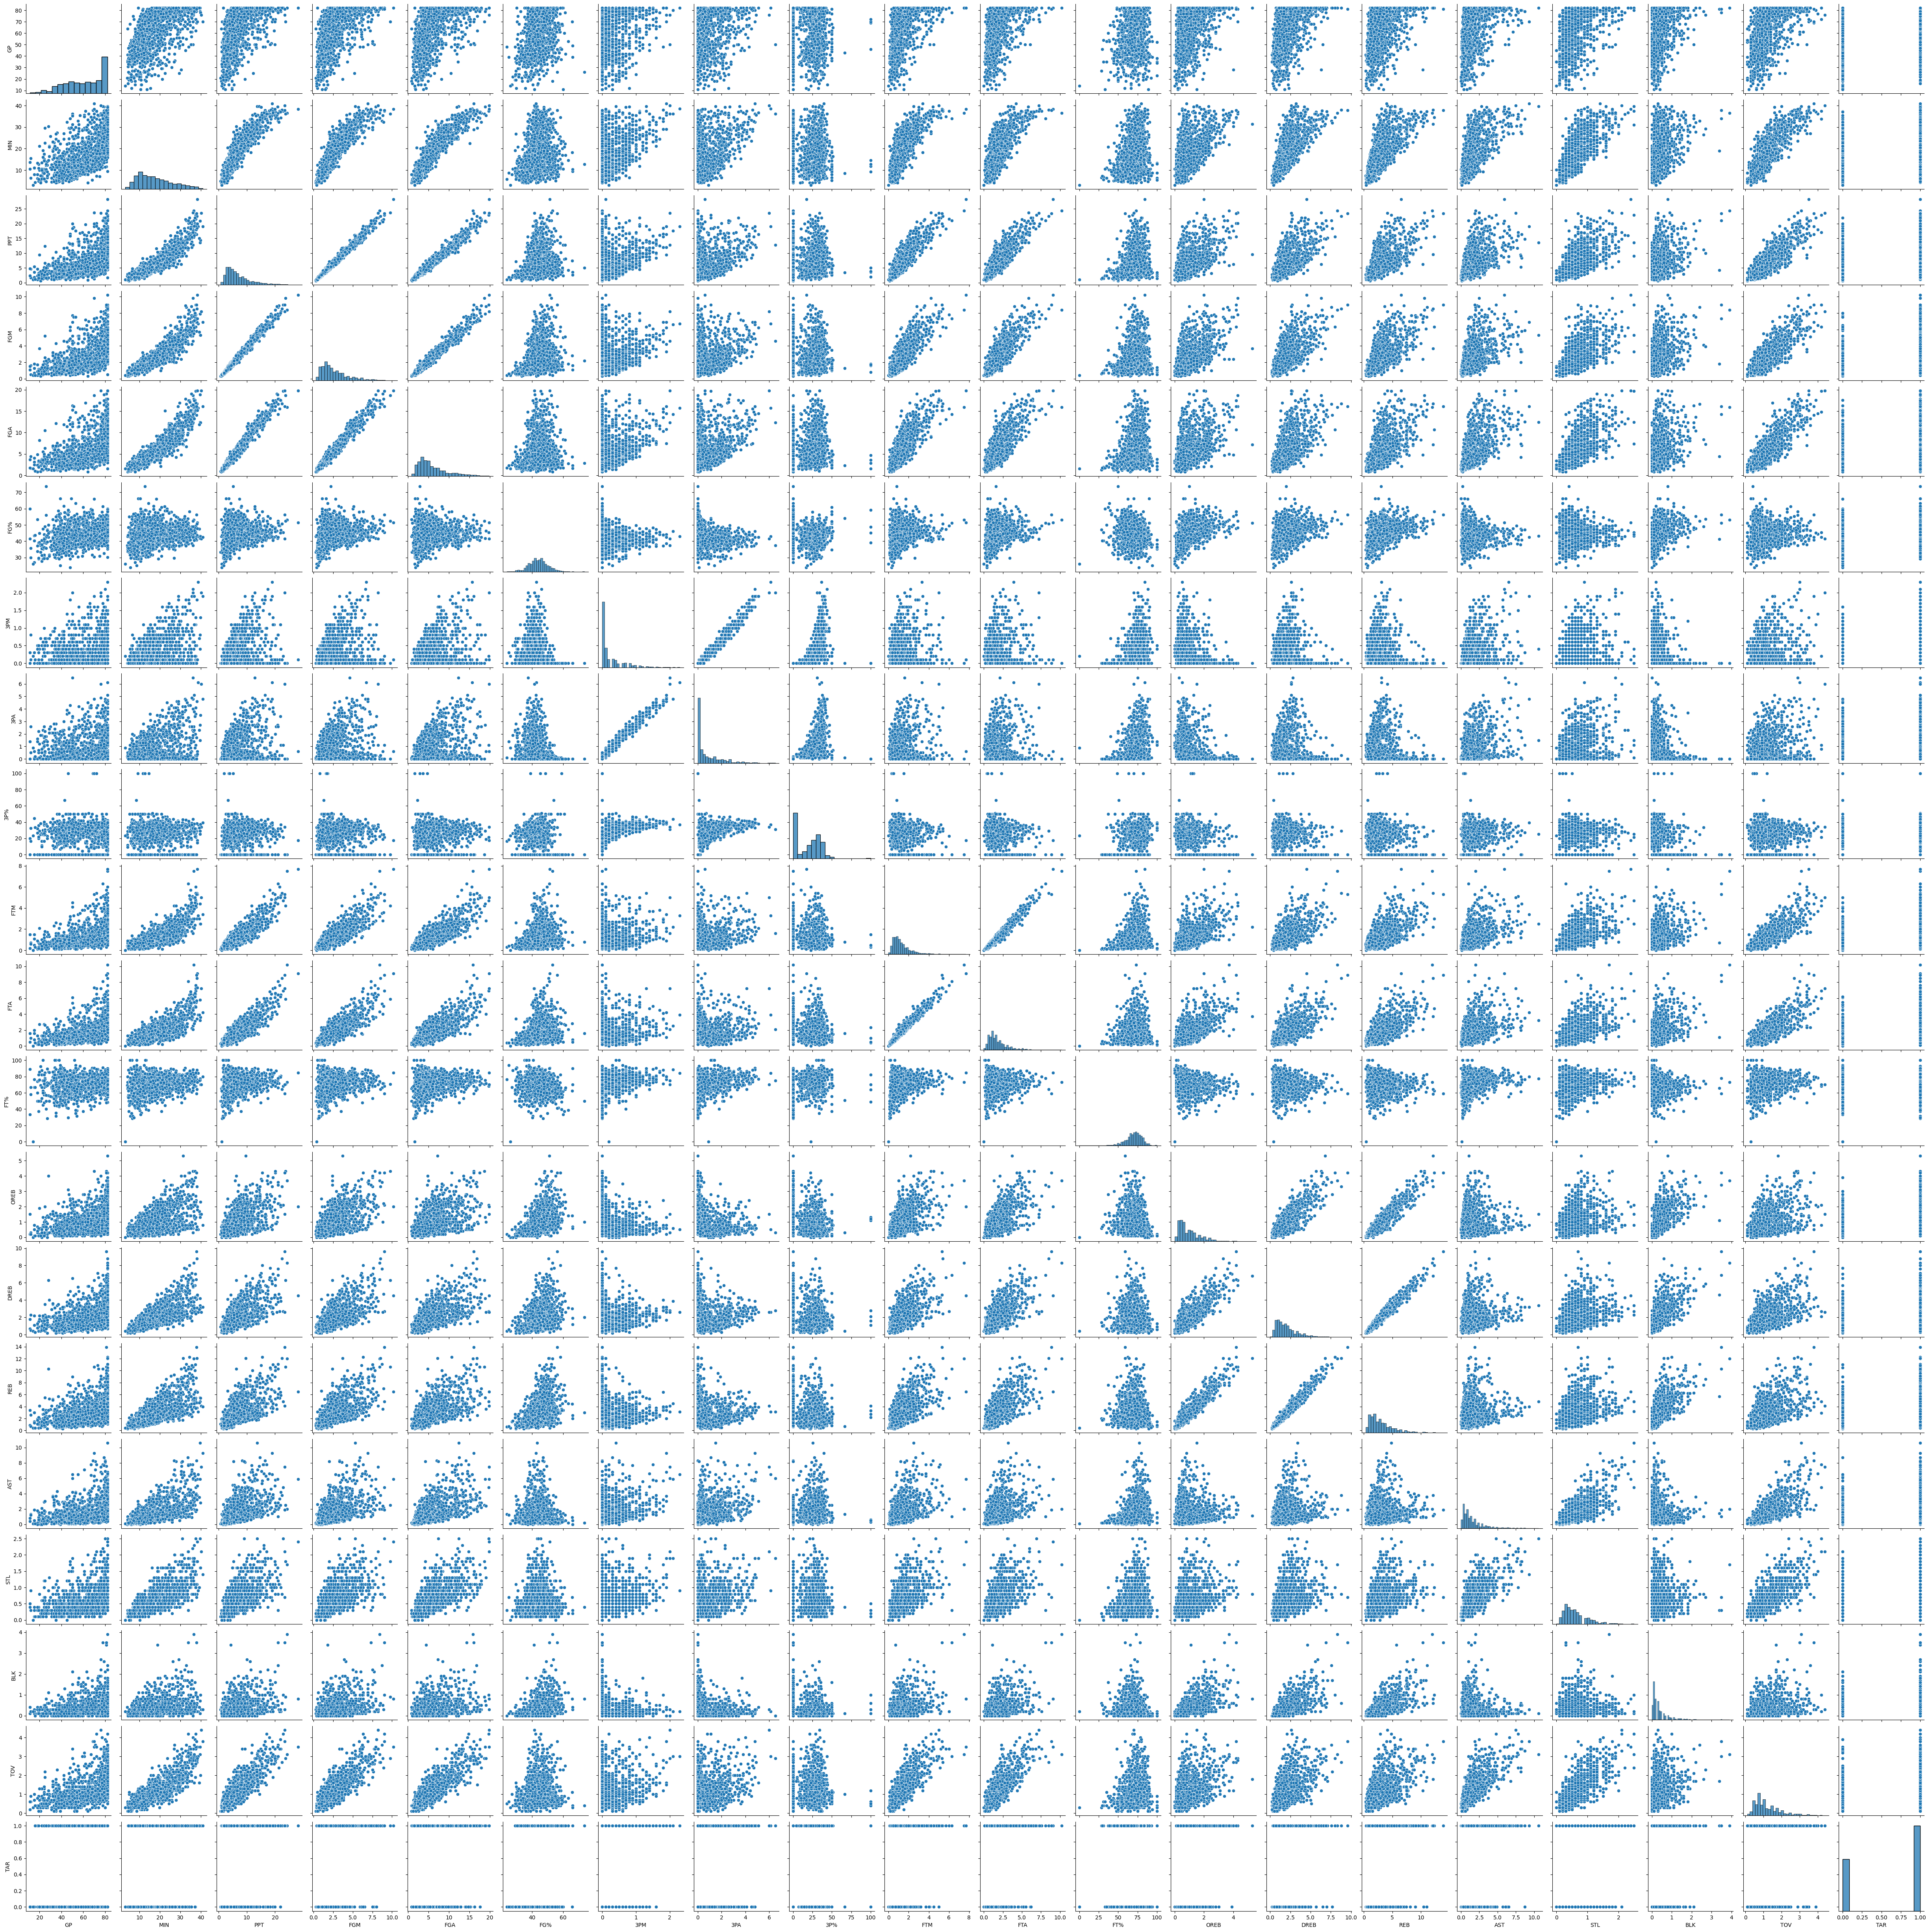

In [31]:
# Drop non-numeric columns for plotting
numeric_df = df.drop(columns=['Position'])

# Create pairplot
sns.pairplot(numeric_df)
plt.show()

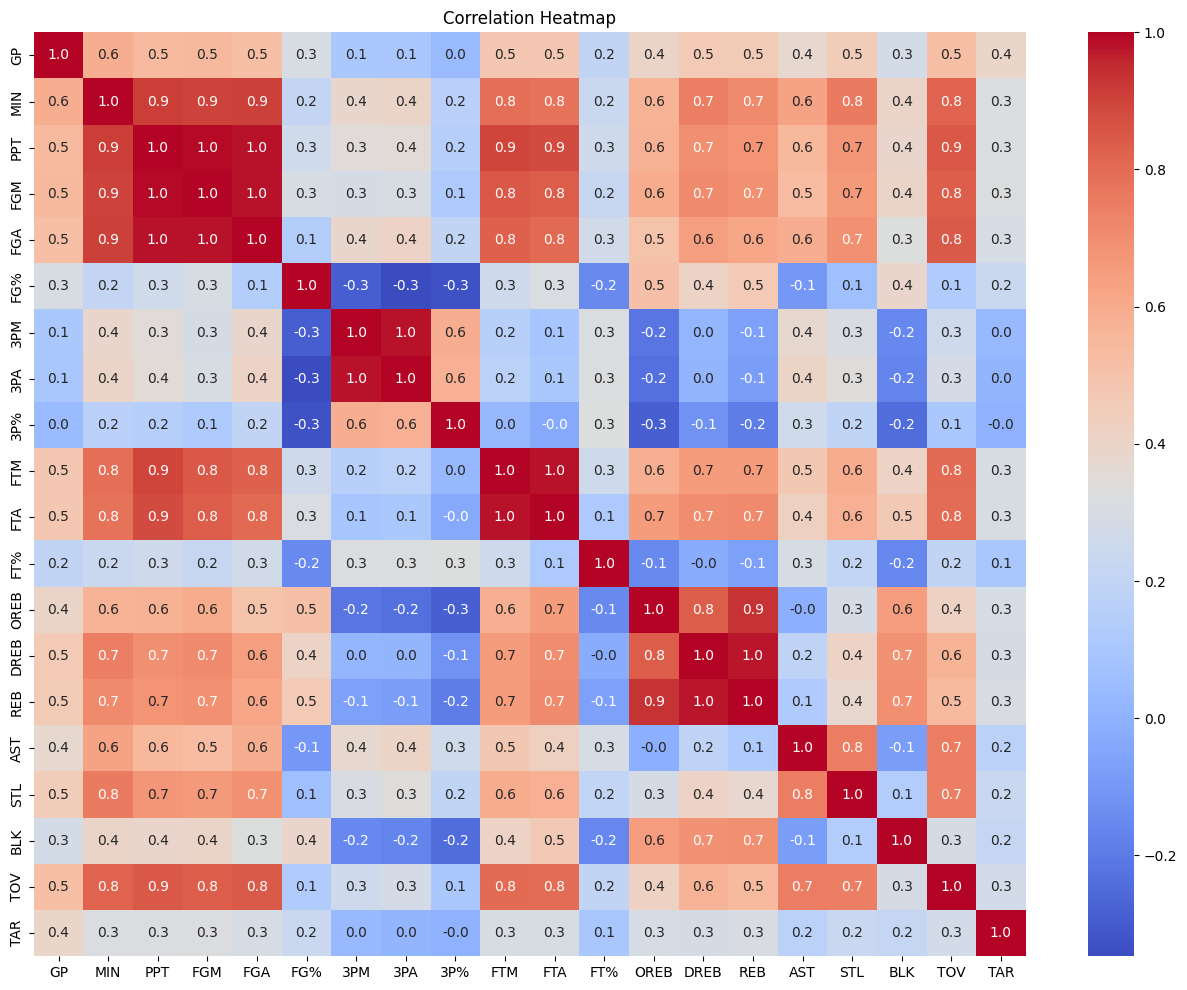

In [35]:
# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Create correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

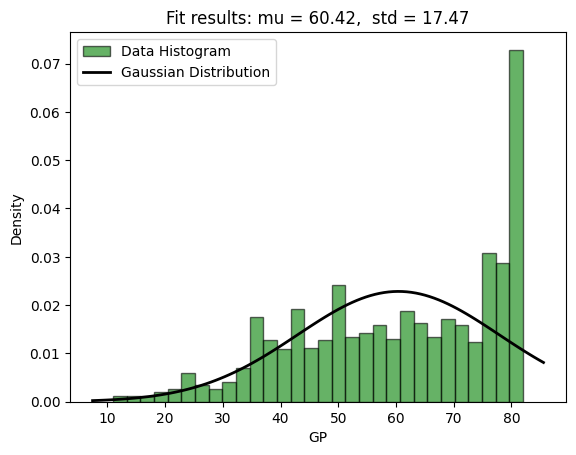

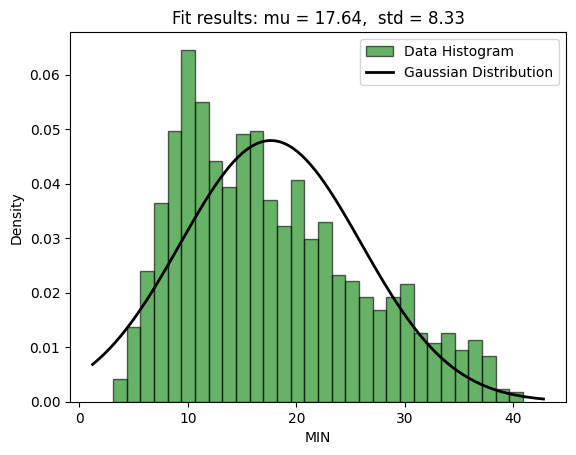

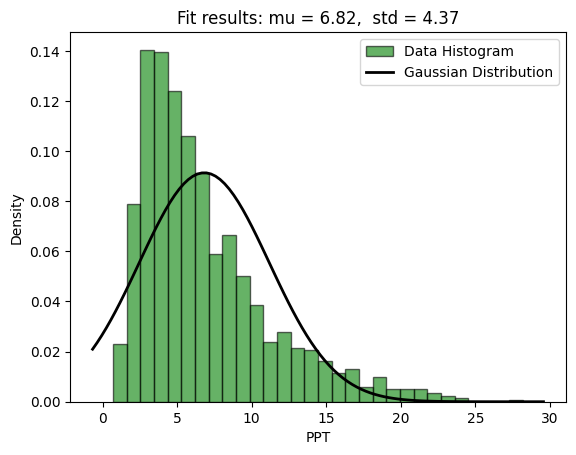

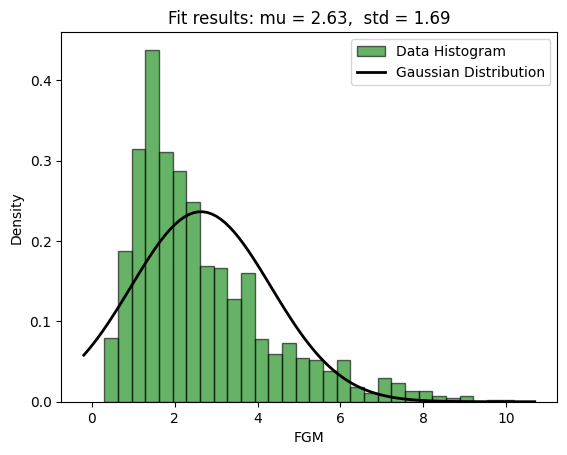

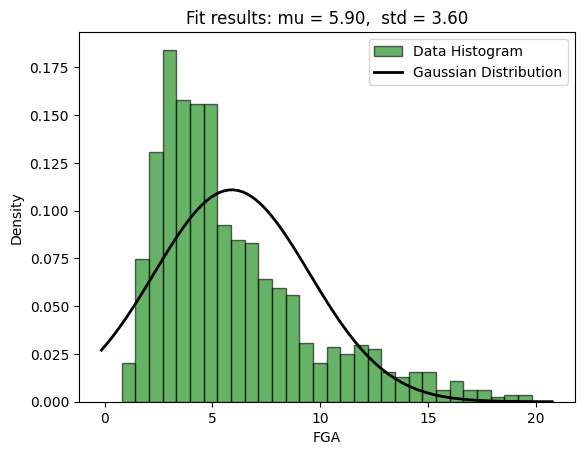

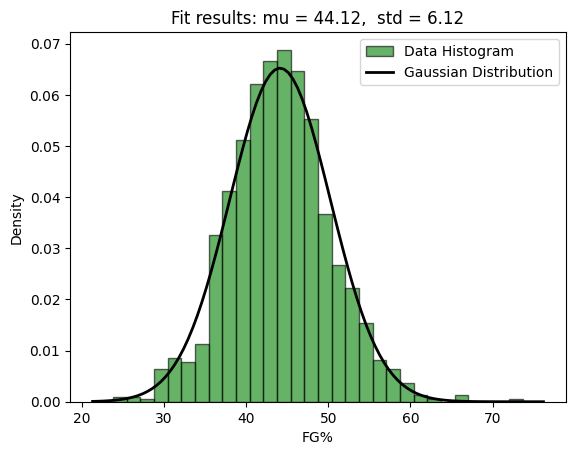

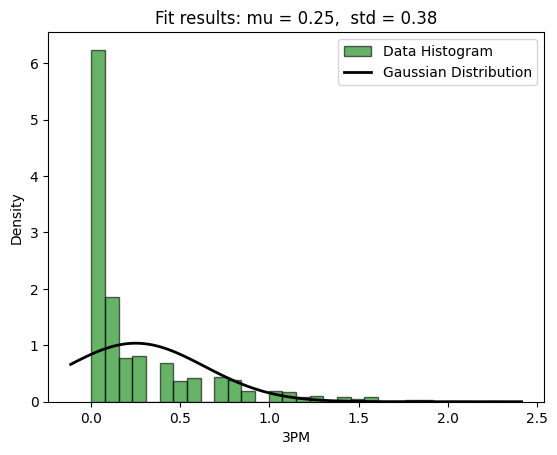

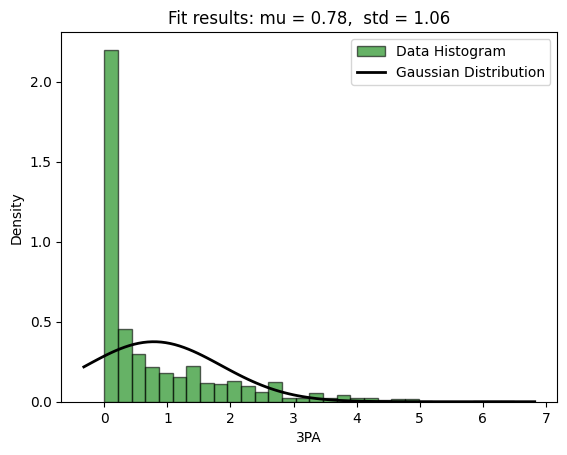

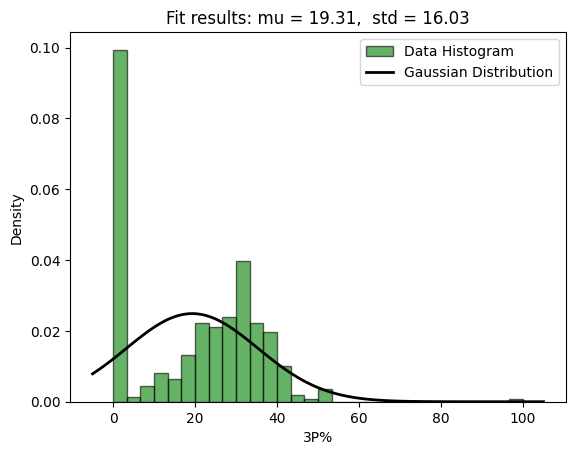

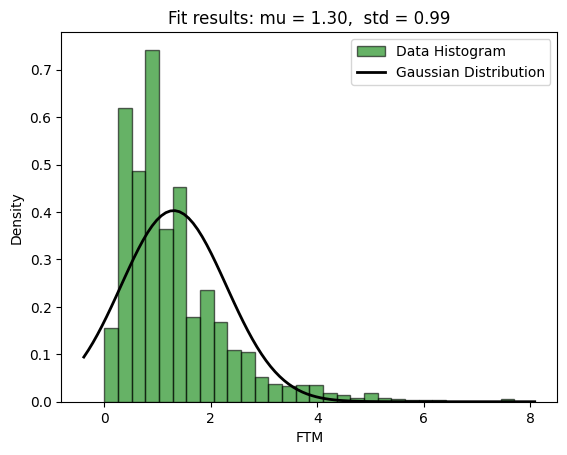

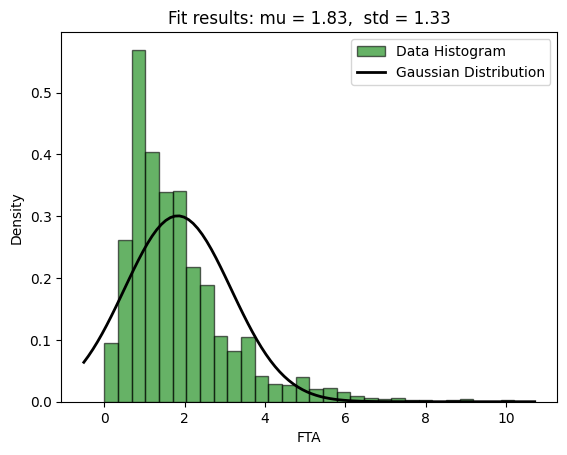

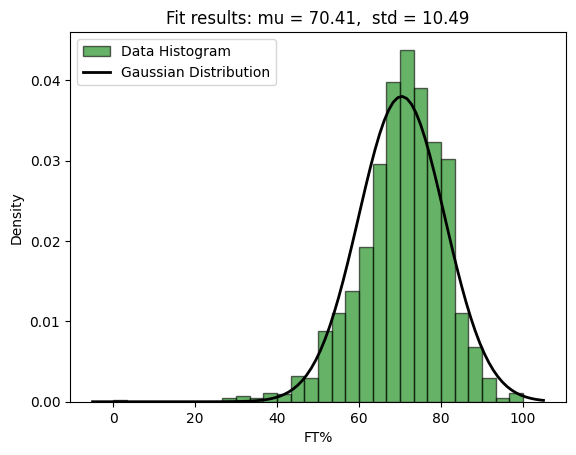

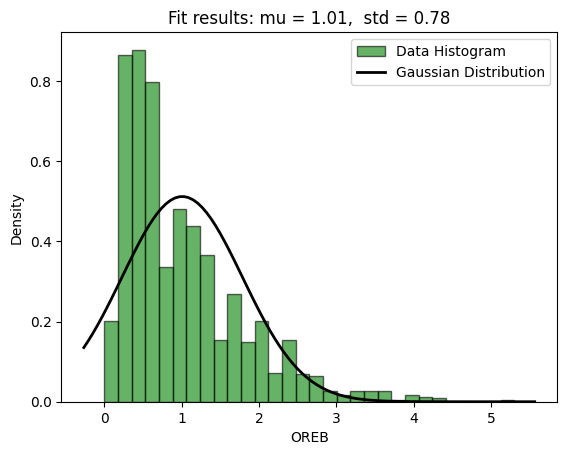

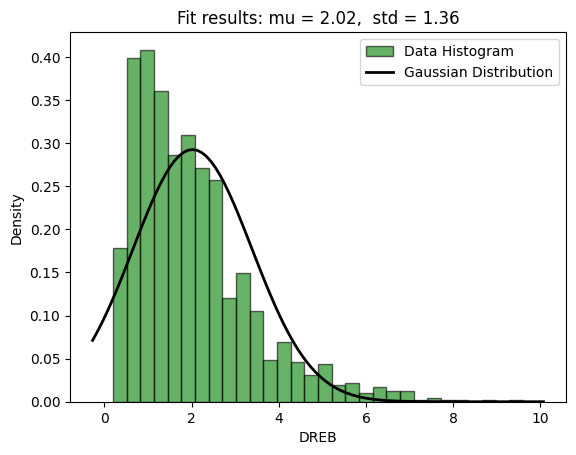

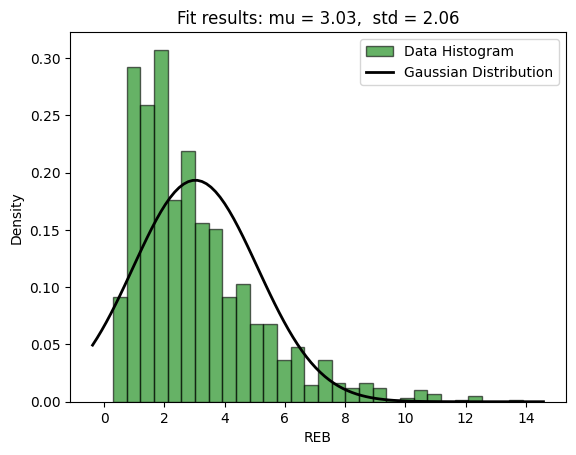

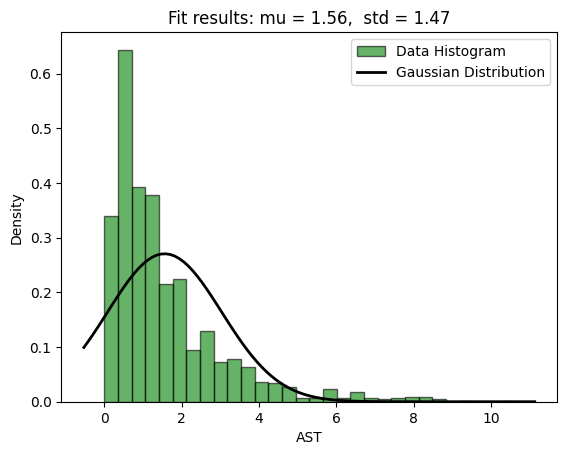

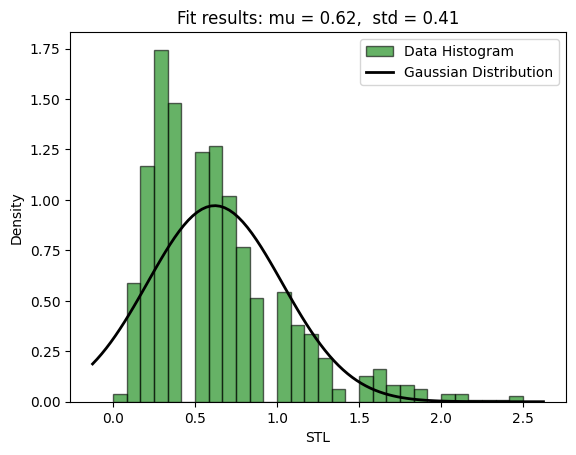

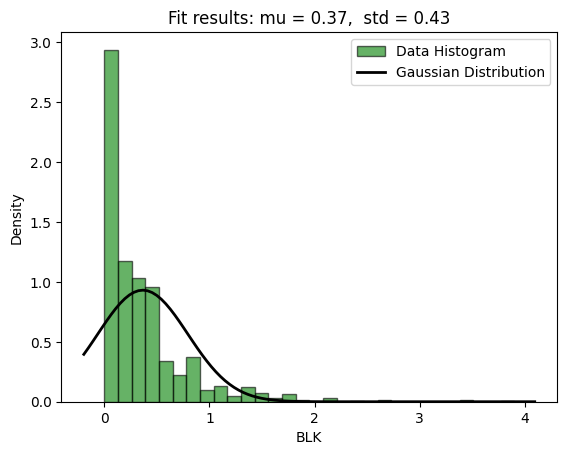

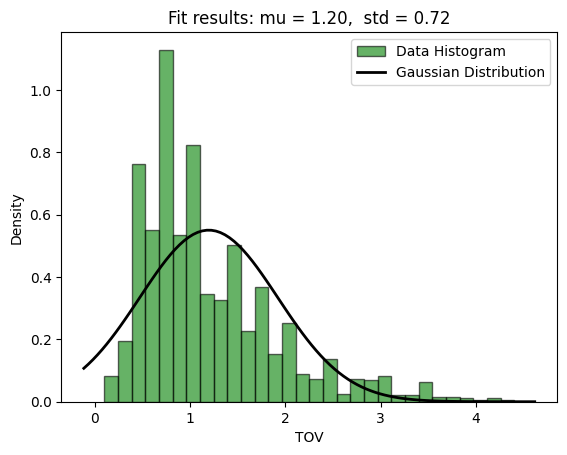

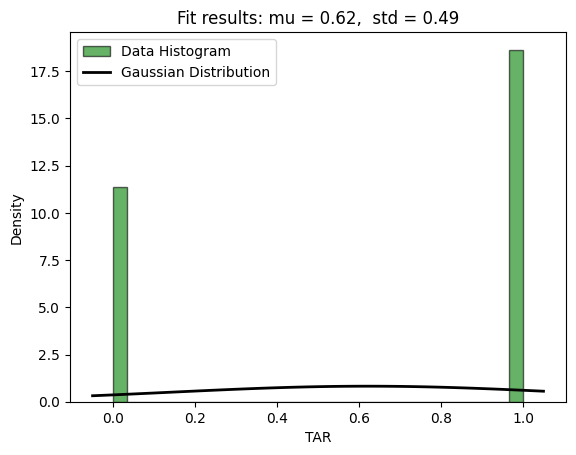

In [53]:
for column in df.select_dtypes(include=[np.number]).columns:
    # Calculate the mean and standard deviation of the column data
    mu, std = df[column].mean(), df[column].std()

    # Plot the histogram of the column data
    plt.hist(df[column], bins=30, alpha=0.6, color='g', density=True, edgecolor='black', label='Data Histogram')

    # Plot the Gaussian distribution with the same mean and std dev
    xmin, xmax = plt.xlim()  # Get the limits of the x-axis
    x = np.linspace(xmin, xmax, 100)
    p = scipy.stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, label='Gaussian Distribution')

    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [54]:
#Because number of game is left skewed
scaler = MinMaxScaler()
df['GP'] = scaler.fit_transform(df[['GP']])

In [55]:
from logging import exception
cols = ['MIN','PPT','FGM','FGA','FG%','3PM','3PA','3P%','FTM','FTA','FT%','OREB','REB','DREB','AST','STL','BLK','TOV']
for col in cols:
    try:
        df[col], _ = scipy.stats.boxcox(df[col] + 0.1)
    except Exception as e:
        print(f'Error in column "{col}": {e}')

In [57]:
# # Get the rows that have null values
# rows_with_nulls = df[df.isnull().any(axis=1)]

# # Print the rows with null values
# print(rows_with_nulls)

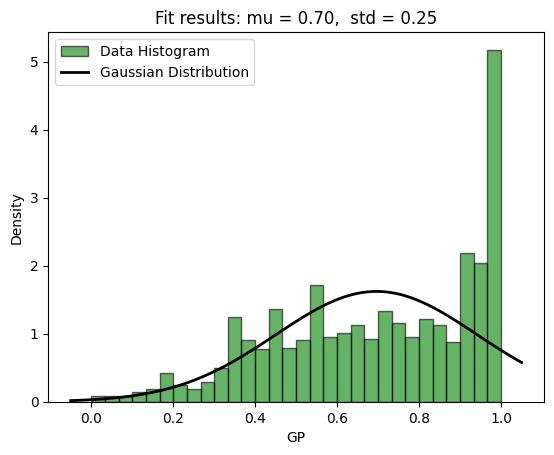

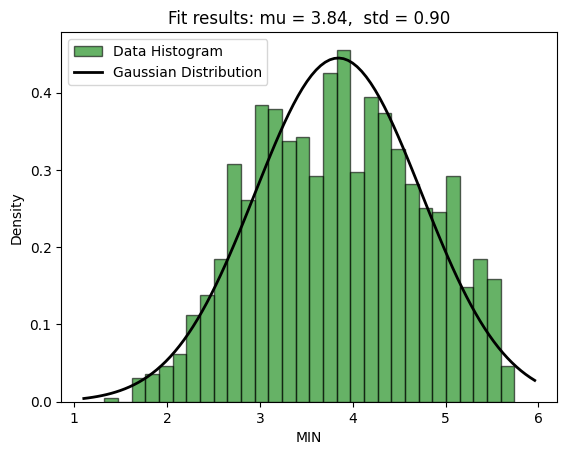

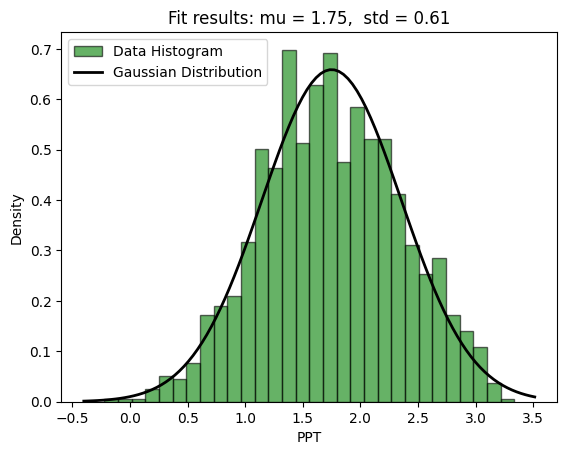

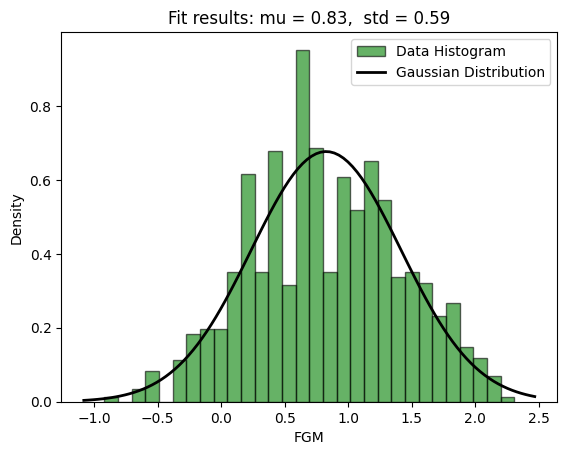

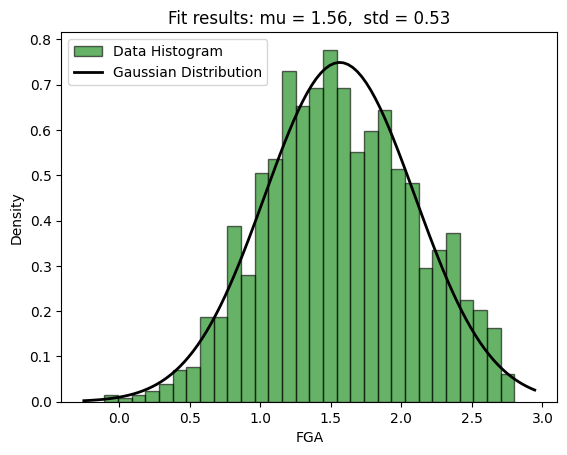

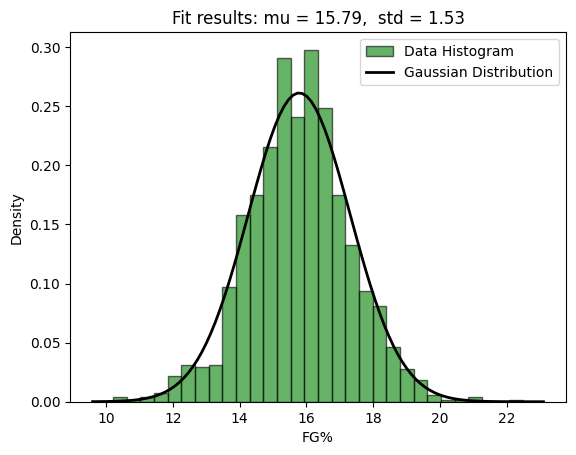

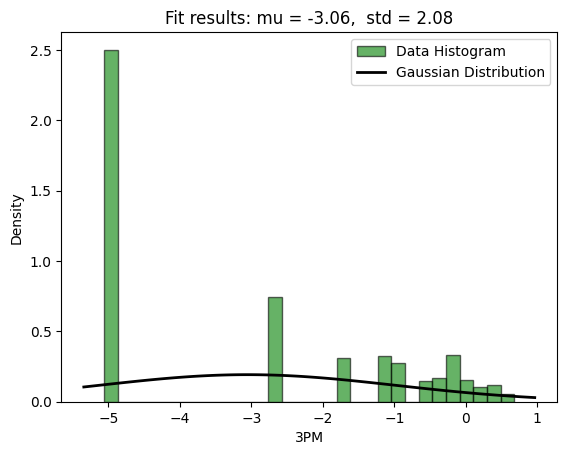

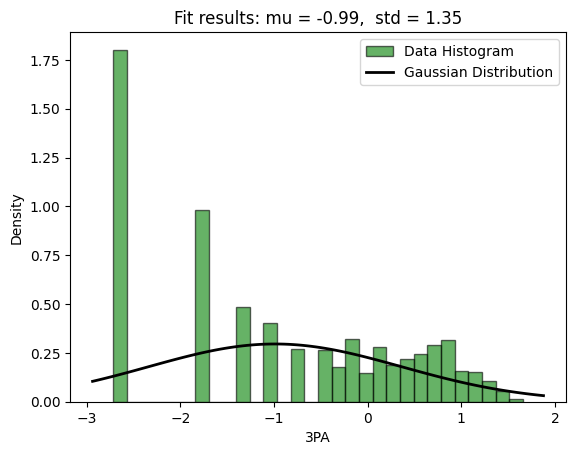

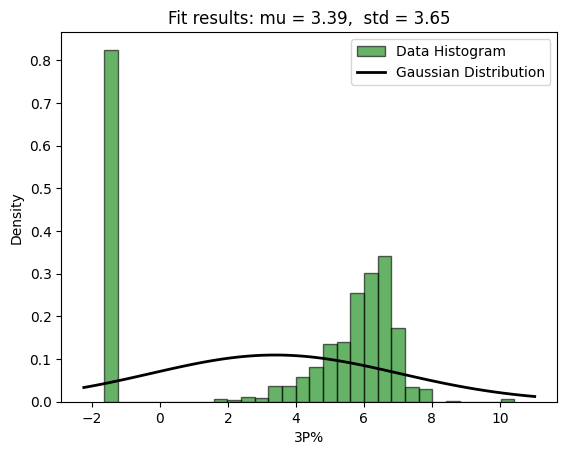

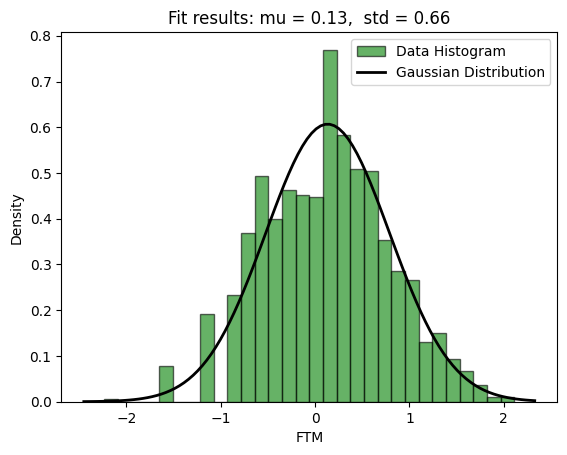

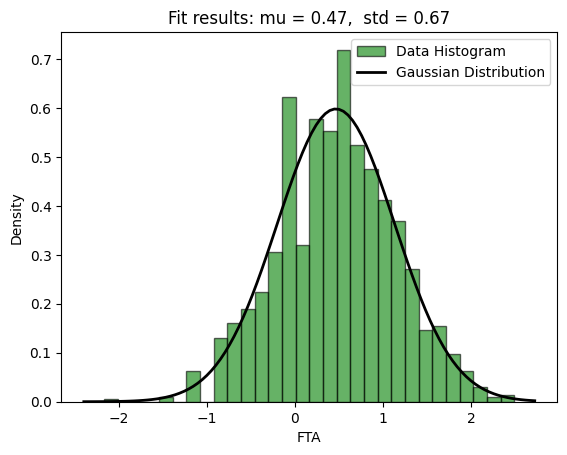

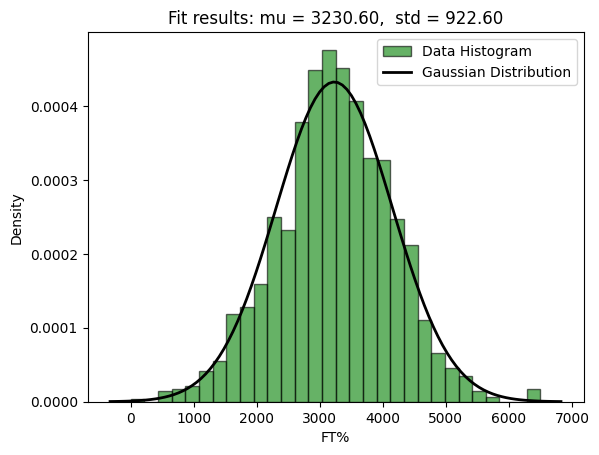

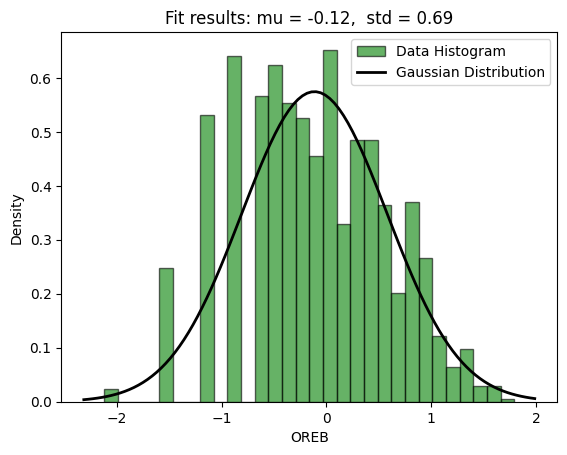

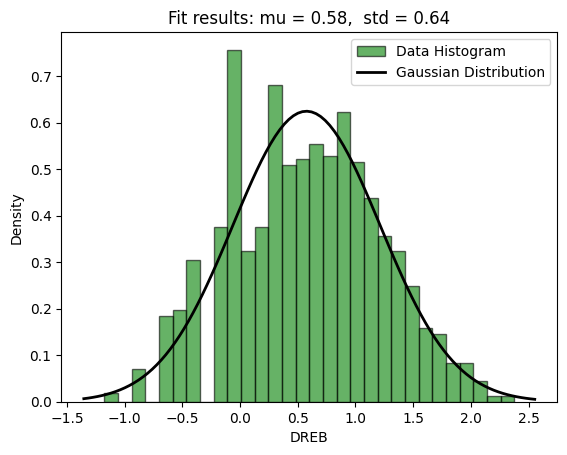

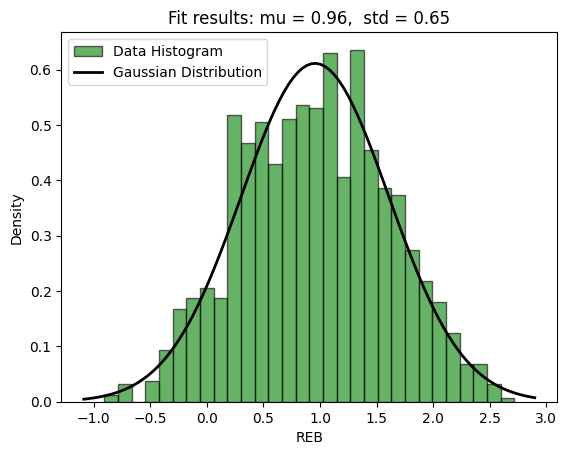

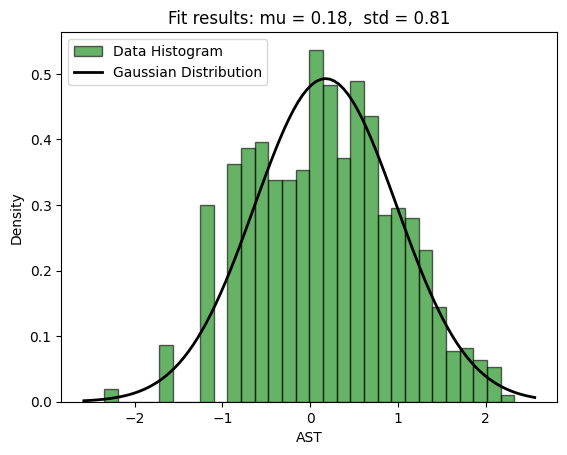

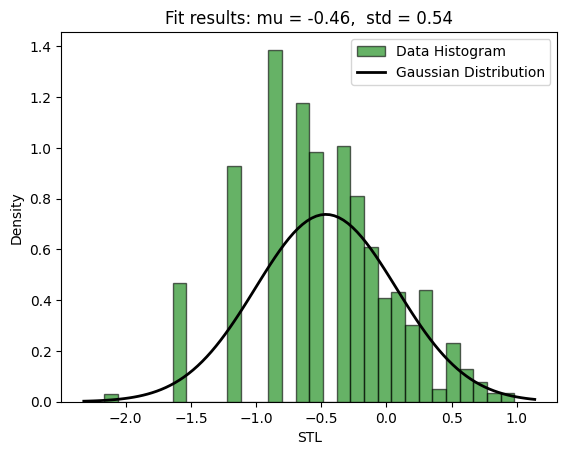

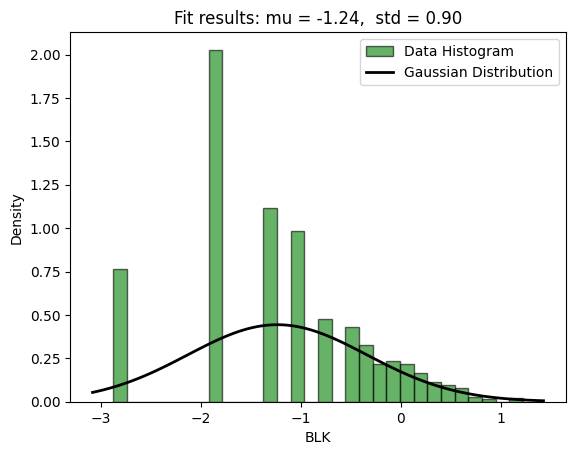

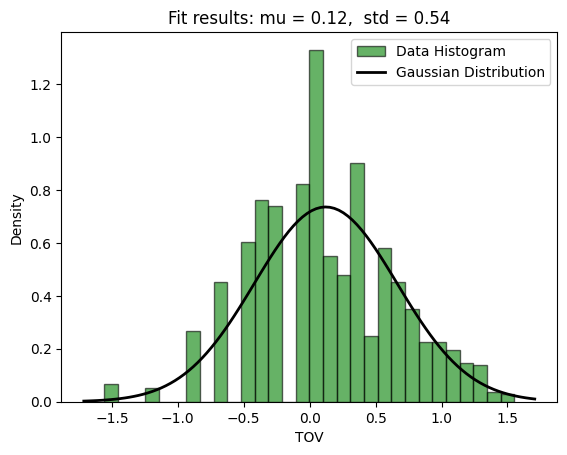

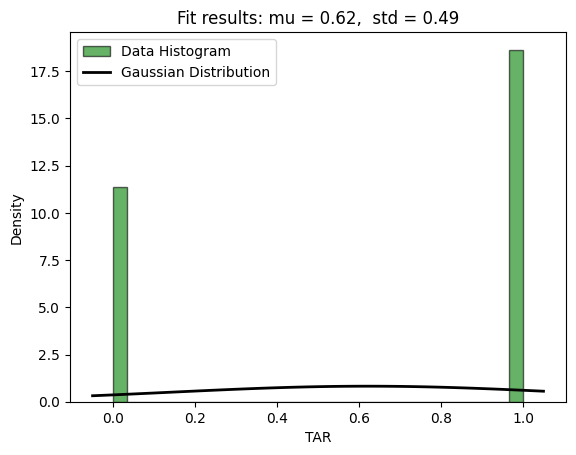

In [76]:
for column in df.select_dtypes(include=[np.number]).columns:
    # Calculate the mean and standard deviation of the column data
    mu, std = df[column].mean(), df[column].std()

    # Plot the histogram of the column data
    plt.hist(df[column], bins=30, alpha=0.6, color='g', density=True, edgecolor='black', label='Data Histogram')

    # Plot the Gaussian distribution with the same mean and std dev
    xmin, xmax = plt.xlim()  # Get the limits of the x-axis
    x = np.linspace(xmin, xmax, 100)
    p = scipy.stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, label='Gaussian Distribution')

    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [59]:
df_with_dummies = pd.get_dummies(df, columns=['Position'])

In [60]:
df_with_dummies.head()

GP       MIN       PPT       FGM       FGA        FG%       3PM  \
0  0.352113  4.875397  2.012268  0.988773  1.951296  13.373698 -0.599769   
1  0.338028  4.837474  1.985309  0.739437  1.837472  11.945800 -0.239112   
2  0.887324  3.747946  1.665901  0.739437  1.515143  15.341095 -0.863521   
3  0.661972  3.261766  1.755852  0.871988  1.658413  15.442257 -2.742700   
4  0.521127  3.247046  1.524544  0.529348  1.103405  17.821943 -5.056853   

        3PA       3P%       FTM  ...       BLK       TOV  TAR  \
0  0.746427  5.605358  0.534321  ... -0.740177  0.338802  0.0   
1  0.989030  5.435991  1.006244  ... -0.536074  0.536439  0.0   
2  0.564211  5.538464  0.000000  ... -0.999658  0.095497  0.0   
3 -0.529569  5.330812  0.000000  ... -1.878490  0.095497  1.0   
4 -1.805556 -1.634666  0.337955  ... -0.740177 -0.105133  1.0   

   Position_Center  Position_Center-Forward  Position_Forward  \
0                0                        0                 1   
1                0                        0                 0   
2                0                        0                 1   
3                0                        0                 0   
4                1                        0                 0   

   Position_Forward-Center  Position_Forward-Guard  Position_Guard  \
0                        0                       0               0   
1                        0                       0               1   
2                        0                       0               0   
3                        0                       0               0   
4                        0                       0               0   

   Position_Guard-Forward  
0                       0  
1                       0  
2                       0  
3                       1  
4                       0  

[5 rows x 27 columns]

In [62]:
from sklearn.model_selection import train_test_split
X = df_with_dummies.drop(columns=['TAR'], axis = 1)
y= df_with_dummies['TAR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


# Define the parameter grid to search
param_grid_KNN = {
    'n_neighbors': [5, 10, 20],
    'weights': ['uniform','distance'],
}


param_grid_RF = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt','log2',None],
}

param_grid_LR = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
}

param_grid_LR = [
    {
        'penalty': ['l1', 'l2', 'none'],  # For these, l1_ratio is not applicable.
    },
    {
        'penalty': ['elasticnet'],
        'l1_ratio': [0.5],  # Specify l1_ratio only for elasticnet.
    }
]

param_grid_MLP = {
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
}



In [111]:
def Run_Model(model, params):
    # Initialize the classifier

    # Initialize the GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=params,
                            scoring='f1', cv=10, verbose = 2)

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # The best estimator can then be saved in a variable
    best_model = grid_search.best_estimator_

    # Print the details of the best model found
    print("Best model parameters:", grid_search.best_params_)
    print("Best model score (F1):", grid_search.best_score_)


    cv_results = grid_search.cv_results_

    print("Rank\tScore\tParams")
    for rank, score, params in zip(cv_results['rank_test_score'], cv_results['mean_test_score'], cv_results['params']):
        print(f"{rank}\t{score:.4f}\t{params}")

    return best_model

In [112]:
KNN = Run_Model(KNeighborsClassifier(),param_grid_KNN)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=5, weig

In [113]:
RF = Run_Model(RandomForestClassifier(),param_grid_RF)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END ..................criterion=gini, max_features=sqrt; total time=   0.4s
[CV] END ..................criterion=gini, max_features=sqrt; total time=   0.4s
[CV] END ..................criterion=gini, max_features=sqrt; total time=   0.4s
[CV] END ..................criterion=gini, max_features=sqrt; total time=   0.4s
[CV] END ..................criterion=gini, max_features=sqrt; total time=   0.4s
[CV] END ..................criterion=gini, max_features=sqrt; total time=   0.4s
[CV] END ..................criterion=gini, max_features=sqrt; total time=   0.4s
[CV] END ..................criterion=gini, max_features=sqrt; total time=   0.4s
[CV] END ..................criterion=gini, max_features=sqrt; total time=   0.4s
[CV] END ..................criterion=gini, max_features=sqrt; total time=   0.4s
[CV] END ..................criterion=gini, max_features=log2; total time=   0.3s
[CV] END ..................criterion=gini, max_f

In [114]:
LR = Run_Model(LogisticRegression(solver='saga',max_iter=10000),param_grid_LR)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] END .........................................penalty=l1; total time=   5.5s
[CV] END .........................................penalty=l1; total time=   4.2s
[CV] END .........................................penalty=l1; total time=   5.3s
[CV] END .........................................penalty=l1; total time=   4.3s
[CV] END .........................................penalty=l1; total time=   6.0s
[CV] END .........................................penalty=l1; total time=   6.5s
[CV] END .........................................penalty=l1; total time=   4.2s
[CV] END .........................................penalty=l1; total time=   5.4s
[CV] END .........................................penalty=l1; total time=   4.2s
[CV] END .........................................penalty=l1; total time=   4.2s
[CV] END .........................................penalty=l2; total time=   4.5s
[CV] END .......................................

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .......................................penalty=none; total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .......................................penalty=none; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .......................................penalty=none; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .......................................penalty=none; total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .......................................penalty=none; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .......................................penalty=none; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .......................................penalty=none; total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .......................................penalty=none; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .......................................penalty=none; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .......................................penalty=none; total time=   3.6s
[CV] END ...................l1_ratio=0.5, penalty=elasticnet; total time=   5.4s
[CV] END ...................l1_ratio=0.5, penalty=elasticnet; total time=   4.2s
[CV] END ...................l1_ratio=0.5, penalty=elasticnet; total time=   5.2s
[CV] END ...................l1_ratio=0.5, penalty=elasticnet; total time=   4.4s
[CV] END ...................l1_ratio=0.5, penalty=elasticnet; total time=   4.2s
[CV] END ...................l1_ratio=0.5, penalty=elasticnet; total time=   5.3s
[CV] END ...................l1_ratio=0.5, penalty=elasticnet; total time=   4.2s
[CV] END ...................l1_ratio=0.5, penalty=elasticnet; total time=   4.2s
[CV] END ...................l1_ratio=0.5, penalty=elasticnet; total time=   5.3s
[CV] END ...................l1_ratio=0.5, penalty=elasticnet; total time=   4.2s
Best model parameters: {'penalty': 'l1'}
Best model score (F1): 0.7653647570819434
Rank	Score	Params
1	0.7654

In [115]:
MLP = Run_Model(MLPClassifier(),param_grid_MLP)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] END ................................activation=identity; total time=   0.5s
[CV] END ................................activation=identity; total time=   0.6s
[CV] END ................................activation=identity; total time=   0.3s
[CV] END ................................activation=identity; total time=   0.2s
[CV] END ................................activation=identity; total time=   0.1s
[CV] END ................................activation=identity; total time=   0.1s
[CV] END ................................activation=identity; total time=   0.3s
[CV] END ................................activation=identity; total time=   0.2s
[CV] END ................................activation=identity; total time=   0.2s
[CV] END ................................activation=identity; total time=   0.2s
[CV] END ................................activation=logistic; total time=   0.2s
[CV] END ................................activat

In [117]:
from sklearn.metrics import f1_score

y_pred = KNN.predict(X_test)
f1 = f1_score(y_test, y_pred)  # Use 'average' parameter appropriately

# Print the F1 score
print(f'KNN F1 Score: {f1}')

KNN F1 Score: 0.7189189189189189


In [119]:
y_pred = RF.predict(X_test)
f1 = f1_score(y_test, y_pred)  # Use 'average' parameter appropriately

# Print the F1 score
print(f'RF F1 Score: {f1}')

RF F1 Score: 0.7536231884057971


In [120]:
y_pred = LR.predict(X_test)
f1 = f1_score(y_test, y_pred)  # Use 'average' parameter appropriately

# Print the F1 score
print(f'LR F1 Score: {f1}')

LR F1 Score: 0.7777777777777778


In [121]:
y_pred = MLP.predict(X_test)
f1 = f1_score(y_test, y_pred)  # Use 'average' parameter appropriately

# Print the F1 score
print(f'MLP F1 Score: {f1}')

MLP F1 Score: 0.7741935483870968
